In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [18]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [21]:
tip_vs_total_bill = df[['total_bill', 'tip']]
print("\nTips vs Total Bill:")
print(tip_vs_total_bill.groupby('total_bill').mean().sort_index())


Tips vs Total Bill:
               tip
total_bill        
3.07         1.000
5.75         1.000
7.25         3.075
7.51         2.000
7.56         1.440
...            ...
45.35        3.500
48.17        5.000
48.27        6.730
48.33        9.000
50.81       10.000

[229 rows x 1 columns]


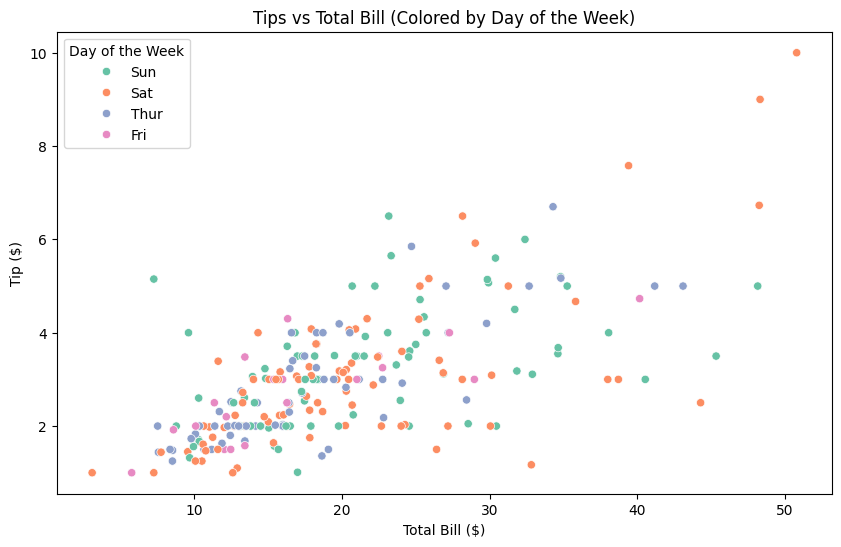

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', hue='day', palette='Set2', data=df)
plt.title('Tips vs Total Bill (Colored by Day of the Week)')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.legend(title='Day of the Week')
plt.show()

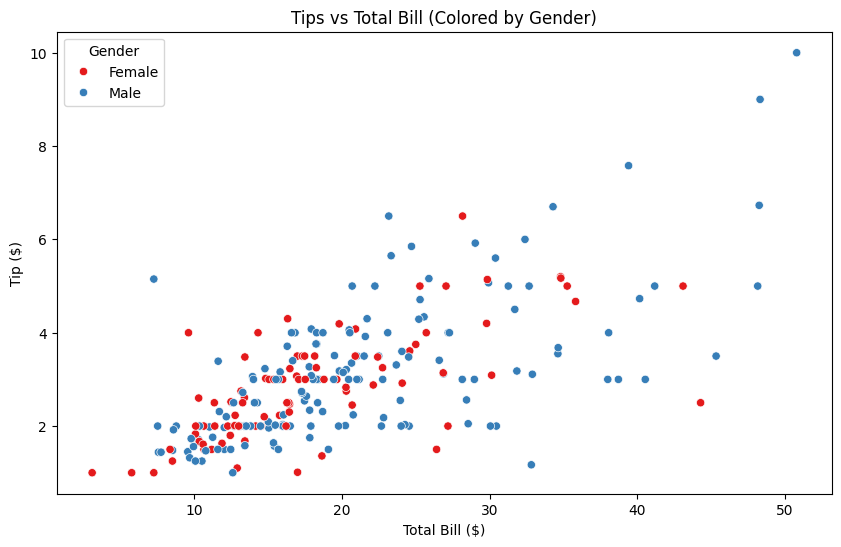

In [26]:
tip_analysis = df[['total_bill', 'tip', 'size', 'sex']]


plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', hue='sex', palette='Set1', data=tip_analysis)
plt.title('Tips vs Total Bill (Colored by Gender)')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.legend(title='Gender')
plt.show()

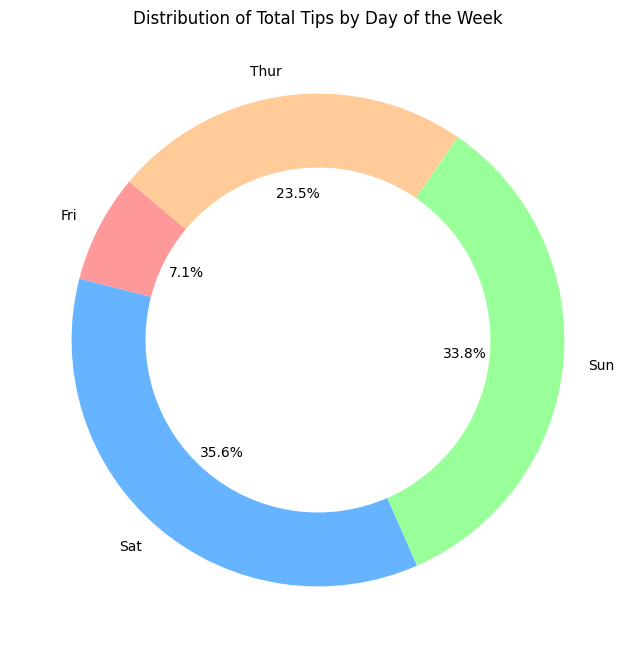

In [37]:
tips_by_day = df.groupby('day')['tip'].sum()
plt.figure(figsize=(8, 8))

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

plt.pie(tips_by_day, labels=tips_by_day.index, colors=colors, autopct='%1.1f%%', startangle=140, 
        wedgeprops=dict(width=0.3))

plt.title('Distribution of Total Tips by Day of the Week')
plt.show()


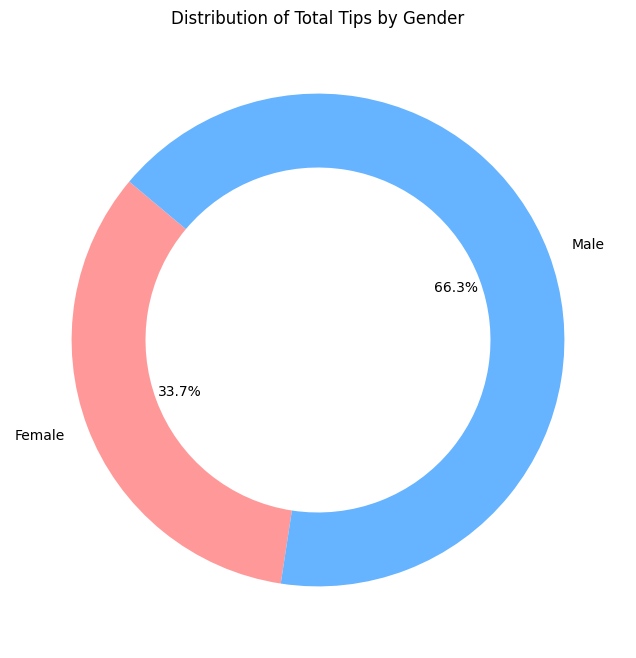

In [41]:
tips_by_gender = df.groupby('sex')['tip'].sum()

plt.figure(figsize=(8, 8))

colors = ['#ff9999', '#66b3ff']

plt.pie(tips_by_gender, labels=tips_by_gender.index, colors=colors, autopct='%1.1f%%', startangle=140, 
        wedgeprops=dict(width=0.3))

plt.title('Distribution of Total Tips by Gender')
plt.show()

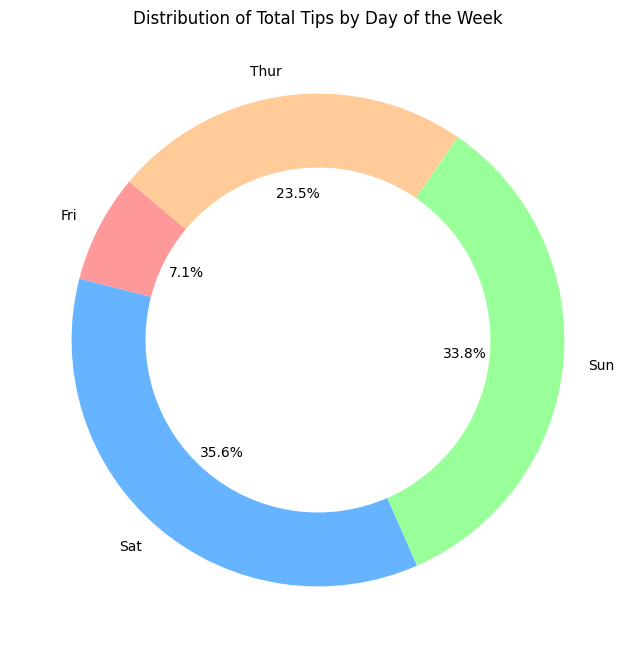

In [42]:
tips_by_day = df.groupby('day')['tip'].sum()

plt.figure(figsize=(8, 8))

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f']

plt.pie(tips_by_day, labels=tips_by_day.index, colors=colors, autopct='%1.1f%%', startangle=140, 
        wedgeprops=dict(width=0.3))

plt.title('Distribution of Total Tips by Day of the Week')
plt.show()


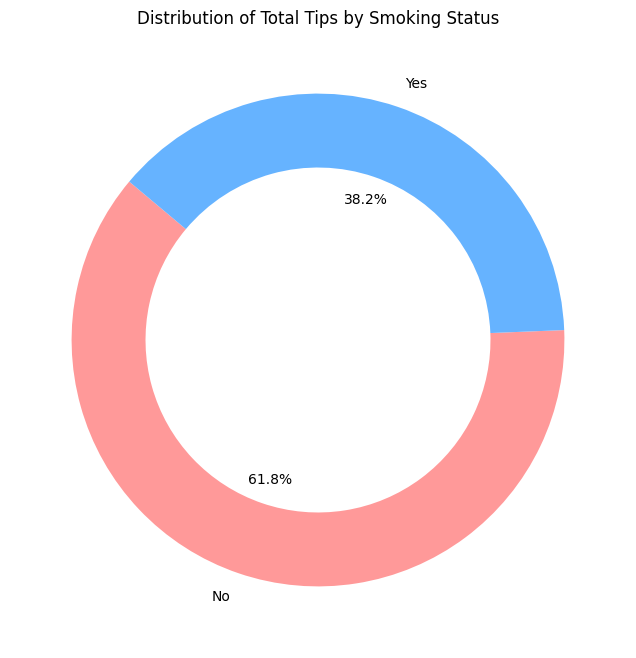

In [43]:
tips_by_smoker = df.groupby('smoker')['tip'].sum()

plt.figure(figsize=(8, 8))

colors = ['#ff9999', '#66b3ff']

plt.pie(tips_by_smoker, labels=tips_by_smoker.index, colors=colors, autopct='%1.1f%%', startangle=140, 
        wedgeprops=dict(width=0.3))

plt.title('Distribution of Total Tips by Smoking Status')
plt.show()


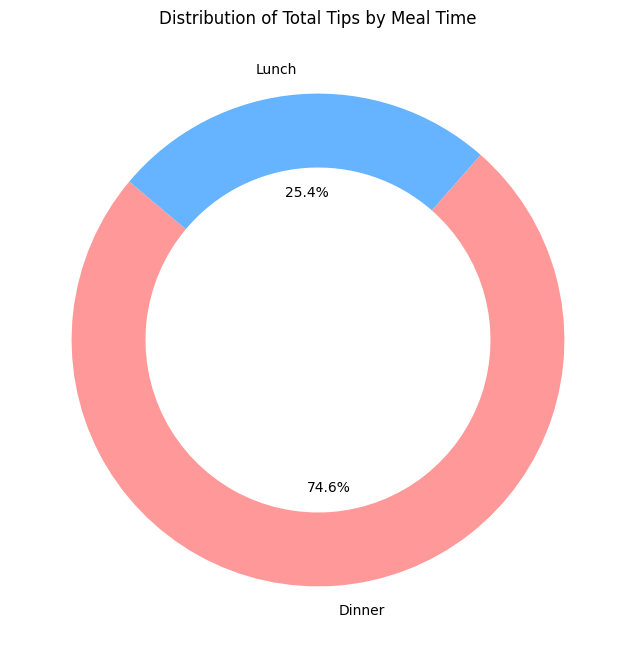

In [45]:
tips_by_meal_time = df.groupby('time')['tip'].sum()

plt.figure(figsize=(8, 8))

colors = ['#ff9999', '#66b3ff']

plt.pie(tips_by_meal_time, labels=tips_by_meal_time.index, colors=colors, autopct='%1.1f%%', startangle=140, 
        wedgeprops=dict(width=0.3))

plt.title('Distribution of Total Tips by Meal Time')
plt.show()

In [57]:
label_encoder = LabelEncoder()

df['smoker'] = label_encoder.fit_transform(df['smoker'])

df['time_of_day'] = label_encoder.fit_transform(df['time_of_day'])

print(df.head())

   total_bill   tip     sex  smoker  size  time_of_day  day_Fri  day_Sat  \
0       16.99  1.01  Female       0     2            0    False    False   
1       10.34  1.66    Male       0     3            0    False    False   
2       21.01  3.50    Male       0     3            0    False    False   
3       23.68  3.31    Male       0     2            0    False    False   
4       24.59  3.61  Female       0     4            0    False    False   

   day_Sun  day_Thur  time_Dinner  time_Lunch  
0     True     False         True       False  
1     True     False         True       False  
2     True     False         True       False  
3     True     False         True       False  
4     True     False         True       False  
